In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import skew
import statsmodels.stats.api as sms

In [3]:
dat = pd.read_csv('datasets_cupsdat.csv')

In [4]:
dat.head()

,Unnamed: 0,count
0,1,1
1,2,7
2,3,3
3,4,3
4,5,2


In [5]:
dat.columns

Index(['Unnamed: 0', 'count'], dtype='object')

In [6]:
dat.describe()

,Unnamed: 0,count
count,100.000000,100.000000
mean,50.500000,2.450000
std,29.011492,1.725478
min,1.000000,0.000000
25%,25.750000,1.000000
50%,50.500000,2.000000
75%,75.250000,3.000000
max,100.000000,7.000000


In [7]:
dat['count'].value_counts()

1    27
2    25
3    17
5     9
0     8
4     7
6     5
7     2
Name: count, dtype: int64

In [11]:
#Removing rows with NaN from the dataframe
dat.dropna(axis=0, inplace=True)

#putting the value_counts into a dataframe
count_frame = dat['count'].value_counts()
count_frame = pd.DataFrame({'number':count_frame.index, 'counts':count_frame})

#Compute percentages for the counts
n = len(dat['count'])
count_frame['percents'] = [100 * x/n for x in count_frame['counts']]

count_frame

,number,counts,percents
1,1,27,27.0
2,2,25,25.0
3,3,17,17.0
5,5,9,9.0
0,0,8,8.0
4,4,7,7.0
6,6,5,5.0
7,7,2,2.0


In [12]:
count_frame['Cumulative %'] = count_frame['percents'].cumsum()
count_frame

,number,counts,percents,Cumulative %
1,1,27,27.0,27.0
2,2,25,25.0,52.0
3,3,17,17.0,69.0
5,5,9,9.0,78.0
0,0,8,8.0,86.0
4,4,7,7.0,93.0
6,6,5,5.0,98.0
7,7,2,2.0,100.0


(array([ 8., 27., 25.,  0., 17.,  7.,  0.,  9.,  5.,  2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

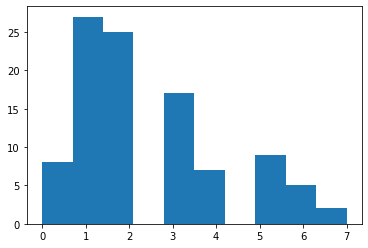

In [13]:
plt.hist(dat['count'])

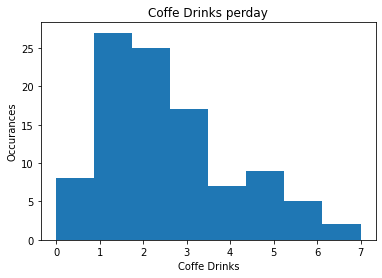

In [15]:
plt.hist(dat['count'], bins=8)
plt.title('Coffe Drinks perday')
plt.xlabel('Coffe Drinks')
plt.ylabel('Occurances')
plt.show()

In [16]:
skew(dat['count'])

0.7666956887374972

In [17]:
np.mean(dat['count'])

2.45

In [18]:
np.median(dat['count'])

2.0

In [20]:
sms.DescrStatsW(list(dat['count'])).tconfint_mean()

(2.1076278223602913, 2.792372177639709)